7.17 Maximum likelihood estimation of a discrete log-concave distribution

In [24]:
import numpy as np
import cvxpy as cp
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
n = 30;
N = 100;
p_true = [0.000790368, 0.0013031, 0.00214844, 0.00354218, 0.00584007, 0.00962865, 0.015875, 0.0261734, 0.0431526, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0711466, 0.0431526, 0.0261734, 0.015875, 0.00962865, 0.00584007, 0.00354218, 0.00214844, 0.0013031, 0.000790368, 0.000479382];
samples = [10, 13, 13, 8, 10, 10, 13, 19, 11, 19, 17, 14, 20, 18, 18, 21, 9, 29, 10, 14, 16, 16, 13, 21, 15, 14, 10, 11, 13, 16, 11, 10, 9, 18, 23, 14, 18, 14, 12, 10, 10, 14, 15, 18, 21, 15, 15, 15, 14, 13, 10, 17, 8, 10, 11, 12, 11, 19, 19, 11, 10, 16, 2, 10, 15, 11, 23, 10, 17, 11, 19, 19, 13, 18, 19, 14, 18, 17, 11, 14, 5, 18, 17, 9, 15, 18, 23, 14, 20, 17, 16, 15, 20, 10, 10, 19, 5, 14, 20, 19];

In [32]:
df = pd.DataFrame(samples, columns=['X'])
df['1'] = np.ones(N)
df = df.groupby('X').sum('1').reindex(range(1,31), fill_value=0)
count = np.array(df['1'])

In [39]:
# MLE with the log-concave assumption
log_p = cp.Variable(n) # log probability
objective = cp.Minimize(- count @ log_p)
constraints = [log_p <=0, 2 * log_p[1:-1] >= log_p[2:] + log_p[:-2], cp.log_sum_exp(log_p) <= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

In [44]:
# empirical MLE
log_p_emp = cp.Variable(n)
objective = cp.Minimize(- count @ log_p_emp)
constraints = [log_p_emp <=0, cp.log_sum_exp(log_p_emp) <= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

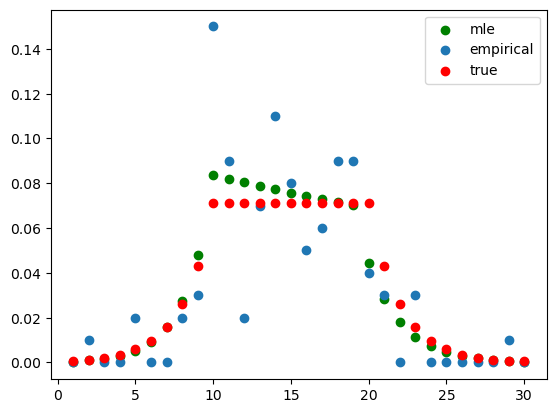

In [47]:
plt.scatter(np.arange(1,31), np.exp(log_p.value), color='g', label='mle')
plt.scatter(np.arange(1,31), np.exp(log_p_emp.value), label='empirical')
plt.scatter(np.arange(1,31), np.array(p_true), color='r', label='true')
plt.legend()
plt.show()